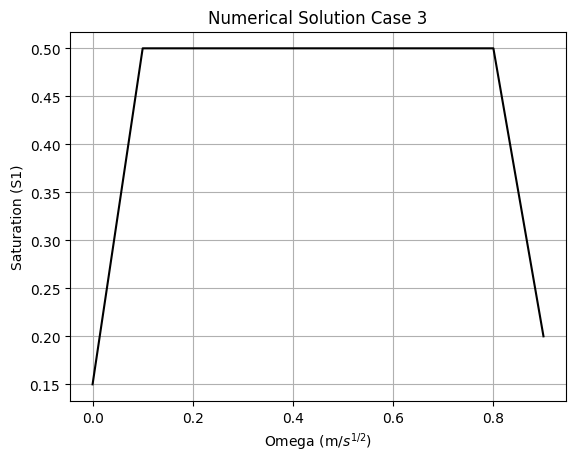

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the diffusion coefficient data from the CSV file
diffusion_data = pd.read_csv('/home/ejt123/2024/CodingFluidFlow/diffusion_coefficient_case3.csv')

# Parameters given by the user
S_j_minus_1 = 0.5  # Boundary condition at j-1
S_2r = 0.15         # Boundary condition at 2r
S_1i = 0.2         # Initial condition for all j at t=0
porosity = 0.25
delta_x = 0.1
delta_t = 0.01
total_space = 1.0  # Total space for simulation
total_time = 1.0   # Total time for simulation
num_time_steps = int(total_time / delta_t)
num_space_steps = int(total_space / delta_x)

# Function to get the diffusion coefficient for a given saturation
def get_diffusion_coefficient(saturation_value):
    #get the average of the two closest values
    return diffusion_data['Diffusion Coefficient'].iloc[
        (diffusion_data['Saturation'] - saturation_value).abs().argsort()[:2]].mean()

# Initialize the saturation array with the initial condition
saturation = np.ones((num_space_steps, num_time_steps)) * S_1i

# Apply the initial boundary conditions
saturation[:, 0] = S_j_minus_1  # Saturation at t=0 for all x
saturation[0, :] = S_2r  # Saturation at x=0 for all t

# Perform the explicit finite difference calculation
for t in range(1, num_time_steps):
    for x in range(1, num_space_steps - 1):
        # Get the diffusion coefficient for the current saturation
        D = get_diffusion_coefficient(saturation[x, t - 1])
        # Apply the finite difference method for diffusion
        saturation[x, t] = saturation[x, t - 1] + (delta_t / (porosity * delta_x ** 2)) * \
                           (D * (saturation[x - 1, t - 1] - saturation[x, t - 1]))

# Calculate omega = x/sqrt(t) for the horizontal axis
time_array = np.arange(delta_t, total_time + delta_t, delta_t)
omega = np.arange(0, total_space, delta_x) / np.sqrt(time_array[-1])

# Plotting the final saturation profile with omega as the horizontal axis
plt.plot(omega, saturation[:, -1], label='Computed S1', color='black')
plt.xlabel(r'Omega (m/$s^{1/2}$)')
plt.ylabel('Saturation (S1)')
plt.title('Numerical Solution Case 3')
plt.grid(True)
plt.show()

In [87]:
num_time_steps

100

In [93]:
case3_analytical = pd.read_csv('/home/ejt123/2024/CodingFluidFlow/Imbibition_analytical_case3.csv') 

In [95]:
omega_analytical = case3_analytical['omega_3']
saturation_analytical = case3_analytical['Saturation']

In [91]:
#scale omega and omega_analytical
saturation.shape

(10, 100)

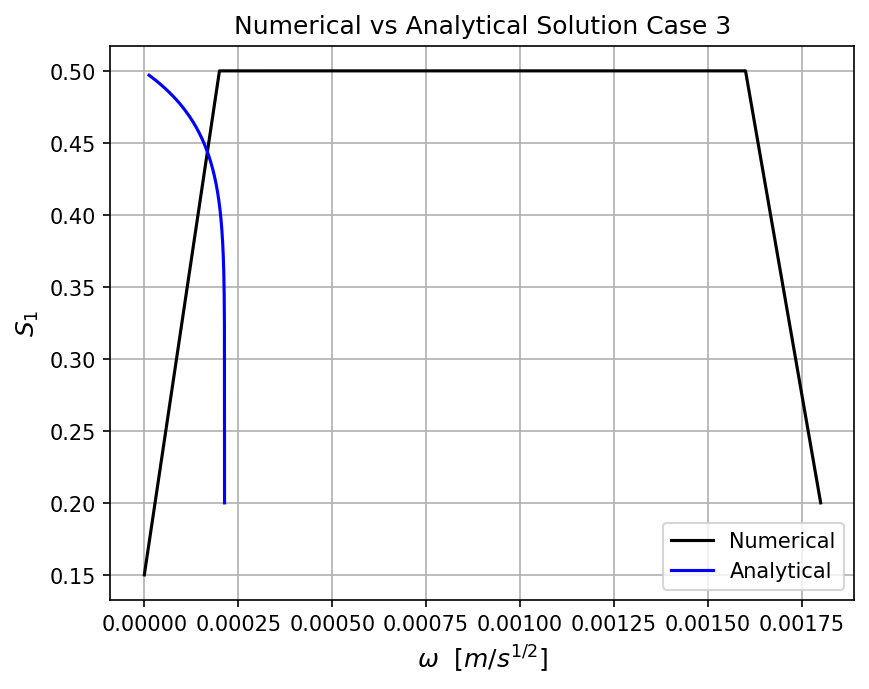

In [98]:
plt.figure(dpi=150)
plt.plot(omega/500, saturation[:, -1], label='Numerical', color='black')
plt.plot(omega_analytical, saturation_analytical, label='Analytical', color='blue')
plt.title('Numerical vs Analytical Solution Case 3')
plt.xlabel(r'$\omega$  $[m/s^{1/2}]$', fontsize=12)
plt.ylabel(r'$S_{1}$', fontsize=12)
plt.legend()
plt.grid()